Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located

In [979]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [980]:
train_set = pd.read_excel('Final_Train.xlsx')
test_set = pd.read_excel('Final_Test.xlsx')

In [981]:
train_set.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [982]:
test_set.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


let us append both datasets

In [983]:
test_set.shape

(1987, 6)

In [984]:
df = train_set.append(test_set)

In [985]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


In [986]:
df.shape

(7948, 7)

In [987]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
dtype: int64

<AxesSubplot:>

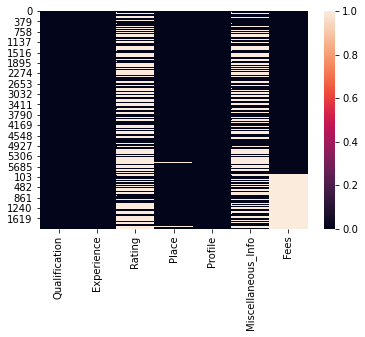

In [988]:
sns.heatmap(df.isna())

lot of null values are present

In [989]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
dtypes: float64(1), object(6)
memory usage: 496.8+ KB


maximum columns are object datatype

In [990]:
df.describe(include='all')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,7948,7948,3556,7917,7948,4494,5961.000000
unique,1801,64,52,948,6,3980,NaN
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,NaN
freq,632,419,907,97,1838,50,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,307.944640
std,NaN,NaN,NaN,NaN,NaN,NaN,190.920373
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,150.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,500.000000


In [991]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

over all we have-->>>>>>>>

Size of training set: 5961 records

Size of test set: 1987 records
    
target variable is 'fees'

Miscellaneous_Info and Ratings have null values the most

we have highly co related values as well



#Feature processing

In [992]:
df_cleaned = df.copy()

In [993]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


lets take one by one --->>

Qualification

In [994]:
df.Qualification.value_counts()

BDS                                                                       632
BHMS                                                                      627
BAMS                                                                      624
MBBS                                                                      441
MBBS, MS - ENT                                                            280
                                                                         ... 
BAMS, MS - Ayurveda, Ph.D Panchakarma                                       1
BDS, MBA - Hospital Administration                                          1
MBBS, MD - General Medicine, PG - Echocardiography                          1
MBBS, DO, Post Graduate Diploma in Maternity and Child Health (PGDMCH)      1
BAMS, MS - Ayurvedic General Surgery                                        1
Name: Qualification, Length: 1801, dtype: int64

In [995]:
df.Qualification.unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Medicine, Post Graduate Diploma in Diabetology (PGDD), MBBS, FRCP - Internal Medicine',
       'MBBS, MS - General Surgery, FAIS, FIAGES',
       'MBBS, MD / MS - Obstetrics & Gynaecology'], dtype=object)

In [996]:
df_cleaned.Qualification = df.Qualification.apply(lambda x:x.split(",")[0])

In [997]:
df_cleaned.Qualification.value_counts()

MBBS                              3313
BDS                               1579
BAMS                               939
BHMS                               938
MD - Dermatology                   102
                                  ... 
Diploma in Diet and Nutrition        1
Post MD SR AIIMS                     1
BIMS                                 1
PDCC - Pediatric Endocrinology       1
FFDRCSI                              1
Name: Qualification, Length: 181, dtype: int64

In [998]:
main_qualications = ['MBBS', 'BDS', 'BAMS', 'BHMS']

In [999]:
df_cleaned

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,BAMS,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,MBBS,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,BSc - Zoology,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0
...,...,...,...,...,...,...,...
1982,BAMS,10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN
1983,MD - Dermatology,4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN
1984,MBBS,9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN


In [1000]:
df_cleaned[~df_cleaned.Qualification.isin(main_qualications)]['Qualification'].apply(lambda x:x.split(" ")[0])

3           BSc
9           BSc
20          MDS
29      Diploma
33           DM
         ...   
1966         MD
1967        MDS
1970        MDS
1980        MDS
1983         MD
Name: Qualification, Length: 1179, dtype: object

In [1001]:
df_cleaned.Qualification = df_cleaned.Qualification.apply(lambda x: x.split(' ')[0])

In [1002]:
pd.DataFrame(df_cleaned.Qualification.value_counts()).Qualification[:60]

MBBS             3313
BDS              1579
BAMS              939
BHMS              938
MD                418
MDS               225
MS                146
DNB                58
DHMS               47
Diploma            39
DDVL               33
Get                30
LCEH               19
B.Sc               15
Fellowship         11
Post                9
PhD                 9
BSc                 9
BSAM                8
DVD                 6
DM                  5
DDV                 5
MRCP                4
Certification       4
MRCS                3
FRCS                3
G.A.M.S             3
Certificate         3
BEMS                2
MD-DVL              2
MRCPS               2
MDS-Oral            2
GCEH                2
MSc                 2
M.D.                2
FCPS                2
FRCP                2
MRCGP               2
Doctor              2
MPH                 2
PGD                 1
FRGUHS              1
Training            1
MDS-                1
Ayurvedic           1
DGO       

In [1003]:
main_qualications = ['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD', 'MDS', 'MS']

In [1004]:
df_cleaned.Qualification = df_cleaned.Qualification.mask(~df_cleaned.Qualification.isin(main_qualications),'Other')

In [1005]:
df_cleaned.Qualification.value_counts()

MBBS     3313
BDS      1579
BAMS      939
BHMS      938
MD        418
Other     390
MDS       225
MS        146
Name: Qualification, dtype: int64

<AxesSubplot:xlabel='Qualification', ylabel='count'>

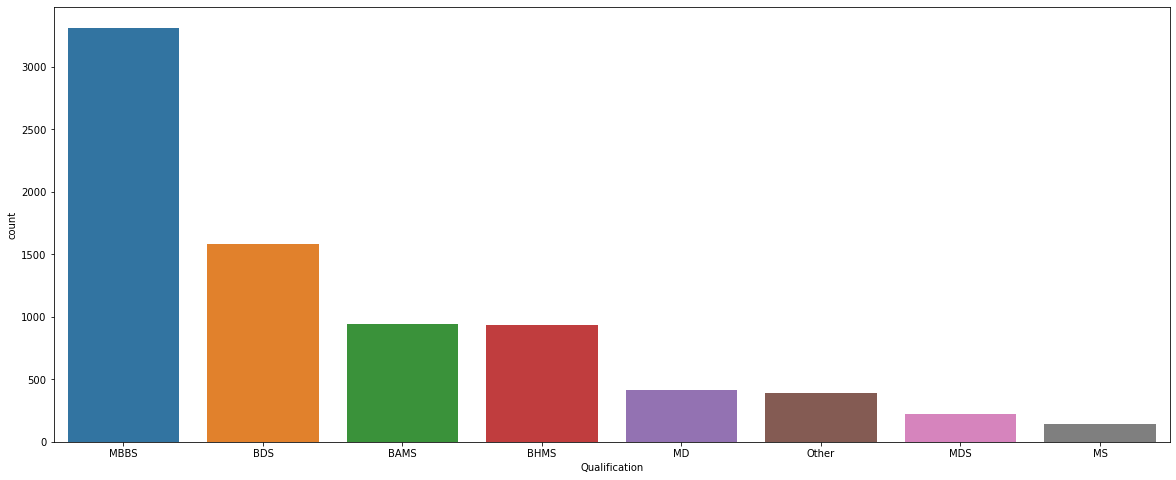

In [1006]:
plt.figure(figsize=(20,8))
sns.countplot(df_cleaned.Qualification,order=df_cleaned.Qualification.value_counts().index)

In [1007]:
countmbbs = len(df_cleaned[df_cleaned.Qualification == 'MBBS'])
countbds = len(df_cleaned[df_cleaned.Qualification == 'BDS'])
print("Percentage of mbbs: {:.2f}%".format((countmbbs / (len(df_cleaned.Qualification))*100)))
print("Percentage of bds Patients: {:.2f}%".format((countbds / (len(df_cleaned.Qualification))*100)))

Percentage of mbbs: 41.68%
Percentage of bds Patients: 19.87%


Most of the Doctors ahve the MBBS qualification and are arounf 41.68% in dataset
The next are the doctors with the BDS degree and around 20%
The next are the doctors with the BAMS degree.

#Experince

In [1008]:
df.Experience

0       24 years experience
1       12 years experience
2        9 years experience
3       12 years experience
4       20 years experience
               ...         
1982    10 years experience
1983     4 years experience
1984     9 years experience
1985    12 years experience
1986     8 years experience
Name: Experience, Length: 7948, dtype: object

In [1009]:
df.Experience.value_counts()

9 years experience     419
10 years experience    404
8 years experience     380
11 years experience    374
12 years experience    358
                      ... 
61 years experience      1
66 years experience      1
58 years experience      1
64 years experience      1
60 years experience      1
Name: Experience, Length: 64, dtype: int64

In [1010]:
df.Experience.unique()

array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '0 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years exp

converting from string to int datatype

In [1011]:
df_cleaned.Experience = df.Experience.str.extract('(\d+)')
df_cleaned.rename(columns={'Experience':'Yrs_of_Exp'},inplace=True)

In [1012]:
df_cleaned.head()

,Qualification,Yrs_of_Exp,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS,24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,BAMS,12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,MBBS,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,Other,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


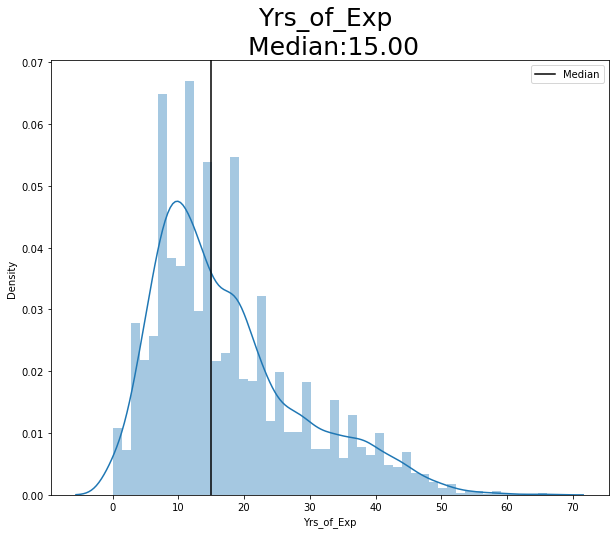

In [1013]:
plt.figure(figsize=(10,8))
sns.distplot(df_cleaned['Yrs_of_Exp'])
plt.title('Yrs_of_Exp \n Median:{0:.2f}'.format(df_cleaned['Yrs_of_Exp'].median()),size=25)
plt.axvline(df_cleaned['Yrs_of_Exp'].median(),color='black',label='Median')
plt.legend()

In [1014]:
df_cleaned.Yrs_of_Exp = df_cleaned.Yrs_of_Exp.astype('int')

In [1015]:
df_cleaned.Yrs_of_Exp.dtype

dtype('int32')

<AxesSubplot:xlabel='Yrs_of_Exp'>

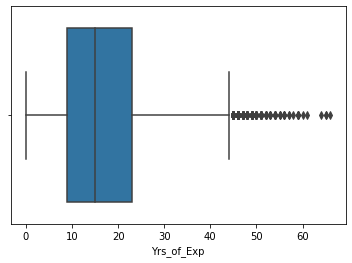

In [1016]:
sns.boxplot(df_cleaned.Yrs_of_Exp)

experience column do have outliers

In [1017]:
df_cleaned.Yrs_of_Exp.describe()

count    7948.000000
mean       17.446653
std        11.201217
min         0.000000
25%         9.000000
50%        15.000000
75%        23.000000
max        66.000000
Name: Yrs_of_Exp, dtype: float64

#Rating

In [1018]:
df.Rating.value_counts()

100%    907
98%     402
99%     327
97%     325
96%     285
95%     225
94%     166
93%     143
90%      95
92%      95
91%      86
88%      54
89%      53
85%      35
83%      32
82%      32
86%      27
80%      26
87%      25
84%      20
67%      17
77%      17
71%      16
81%      15
79%      15
76%      13
73%      13
60%      11
70%       8
75%       8
74%       7
78%       7
69%       6
56%       5
55%       5
68%       5
64%       4
72%       3
57%       3
63%       2
62%       2
53%       2
65%       2
33%       2
7%        1
58%       1
40%       1
47%       1
36%       1
48%       1
52%       1
45%       1
Name: Rating, dtype: int64

converting into float and also filling null values

In [1019]:
df_cleaned.Rating = df.Rating.str.strip('%').astype('float')

In [1020]:
df_cleaned.Rating.dtype

dtype('float64')

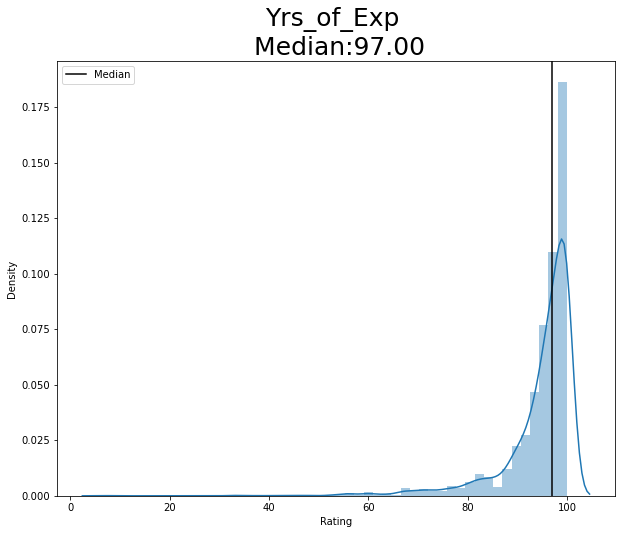

In [1021]:
plt.figure(figsize=(10,8))
sns.distplot(df_cleaned['Rating'])
plt.title('Yrs_of_Exp \n Median:{0:.2f}'.format(df_cleaned['Rating'].median()),size=25)
plt.axvline(df_cleaned['Rating'].median(),color='black',label='Median')
plt.legend()

we can see from graph that median is quite high arounf 97

In [1022]:
len(df_cleaned)

7948

In [1023]:
len(df)

7948

In [1024]:
df.Rating.isna().sum()

4392

In [1025]:
df.Rating.isna().mean()

0.552591847005536

<AxesSubplot:xlabel='Rating', ylabel='Fees'>

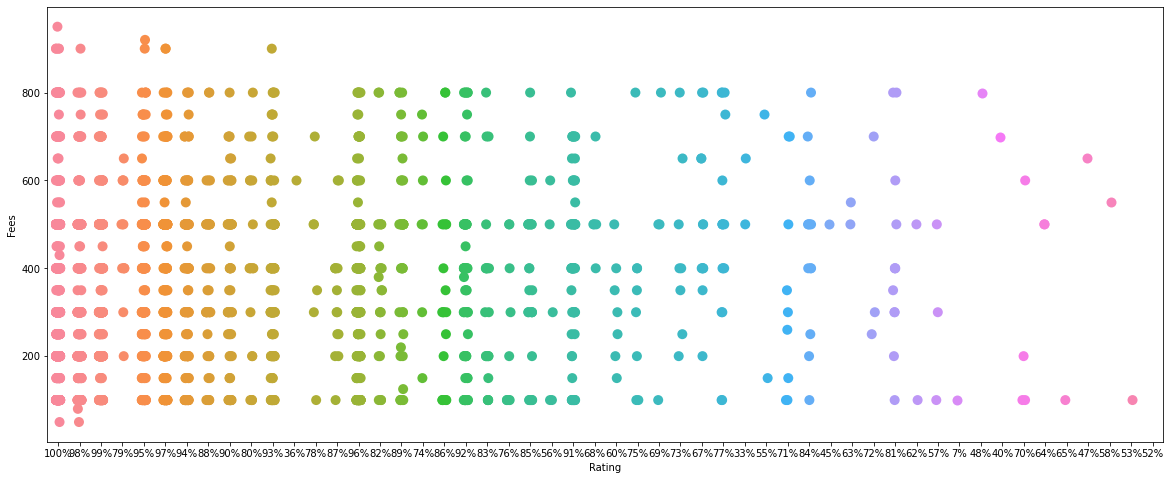

In [1026]:
plt.figure(figsize=(20,8))

sns.stripplot(df.Rating,df.Fees,s=10)

In [1027]:
pip install feature-engine

In [1028]:
import feature_engine
from feature_engine.imputation import RandomSampleImputer


In [1029]:
imputers = [RandomSampleImputer(variables=['Rating'])]

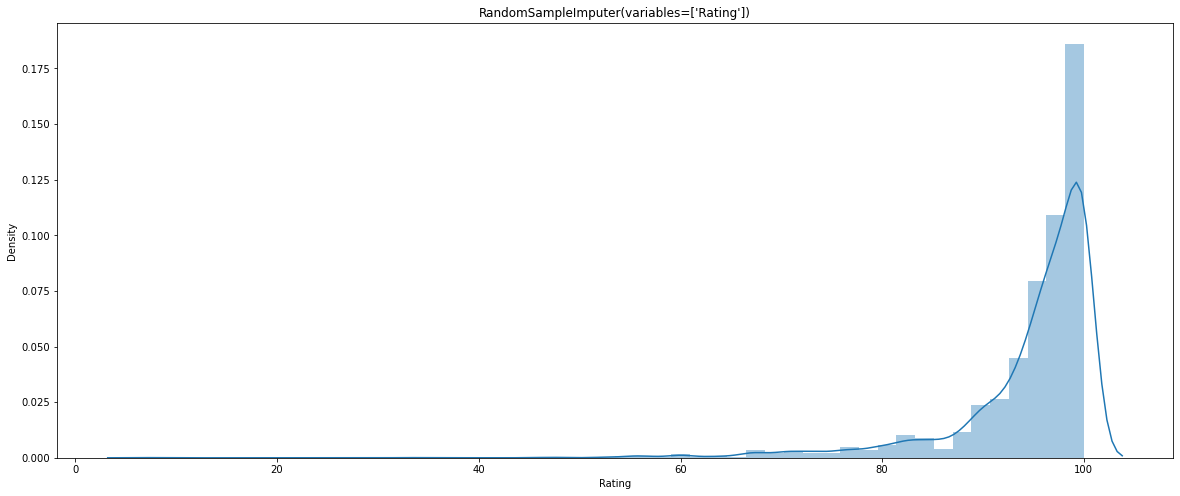

In [1030]:
for imputer in imputers:
    plt.figure(figsize=(20,8))

    sns.distplot(imputer.fit_transform(df_cleaned)['Rating'])
    plt.title(imputer)

Random sample imputation is giving us the best results.

In [1031]:
df_cleaned = RandomSampleImputer(variables=['Rating']).fit_transform(df_cleaned)

In [1032]:
df_cleaned.Rating.isna().sum()

0

<AxesSubplot:>

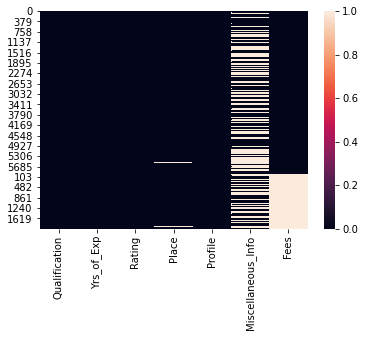

In [1033]:
sns.heatmap(df_cleaned.isna())

<AxesSubplot:xlabel='Rating'>

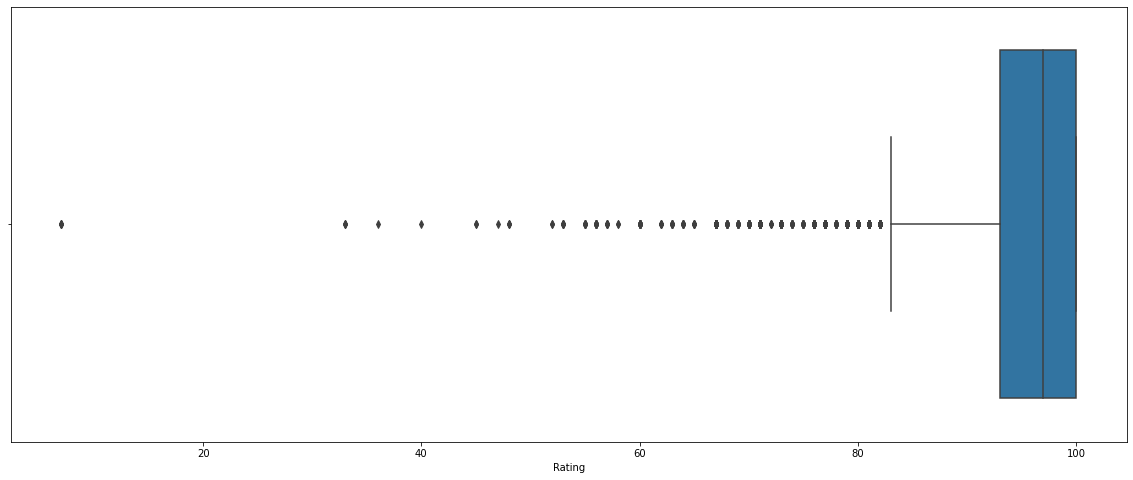

In [1034]:
plt.figure(figsize=(20,8))
sns.boxplot(df_cleaned.Rating)

#Place

In [1035]:
df.Place.value_counts()

HSR Layout, Bangalore        97
Andheri West, Mumbai         97
Dwarka, Delhi                93
Banjara Hills, Hyderabad     85
Mulund West, Mumbai          81
                             ..
Jagriti Enclave, Delhi        1
Edakochi, Ernakulam           1
Piravom, Ernakulam            1
Rohini West, Delhi            1
Peyad, Thiruvananthapuram     1
Name: Place, Length: 948, dtype: int64

In [1036]:
len(df.Place.unique())

949

In [1037]:
df.Place

0                Kakkanad, Ernakulam
1              Whitefield, Bangalore
2         Mathikere - BEL, Bangalore
3       Bannerghatta Road, Bangalore
4              Keelkattalai, Chennai
                    ...             
1982         Basavanagudi, Bangalore
1983                Choolai, Chennai
1984                  Porur, Chennai
1985              Arekere, Bangalore
1986           Pallikaranai, Chennai
Name: Place, Length: 7948, dtype: object

In [1038]:
df.Place.isna().sum()

31

In [1039]:
df_cleaned['Place'] = df_cleaned['Place'].fillna(df_cleaned['Place'].mode()[0])

In [1040]:
df_cleaned.Place.isna().sum()

0

In [1041]:
df_cleaned.head()

,Qualification,Yrs_of_Exp,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS,24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,BAMS,12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,MBBS,9,100.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,Other,12,100.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


In [1042]:
df_cleaned.Place = df_cleaned.Place.apply(lambda x : x.split(' ')[-1])

In [1043]:
df_cleaned.Place.value_counts()

Bangalore             1678
Mumbai                1639
Delhi                 1602
Hyderabad             1284
Chennai               1142
Coimbatore             298
Ernakulam              201
Thiruvananthapuram     103
e                        1
Name: Place, dtype: int64

In [1044]:
df_cleaned = df_cleaned[df_cleaned.Place != 'e']

In [1045]:
df_cleaned.Place.value_counts()

Bangalore             1678
Mumbai                1639
Delhi                 1602
Hyderabad             1284
Chennai               1142
Coimbatore             298
Ernakulam              201
Thiruvananthapuram     103
Name: Place, dtype: int64

<AxesSubplot:xlabel='Place', ylabel='count'>

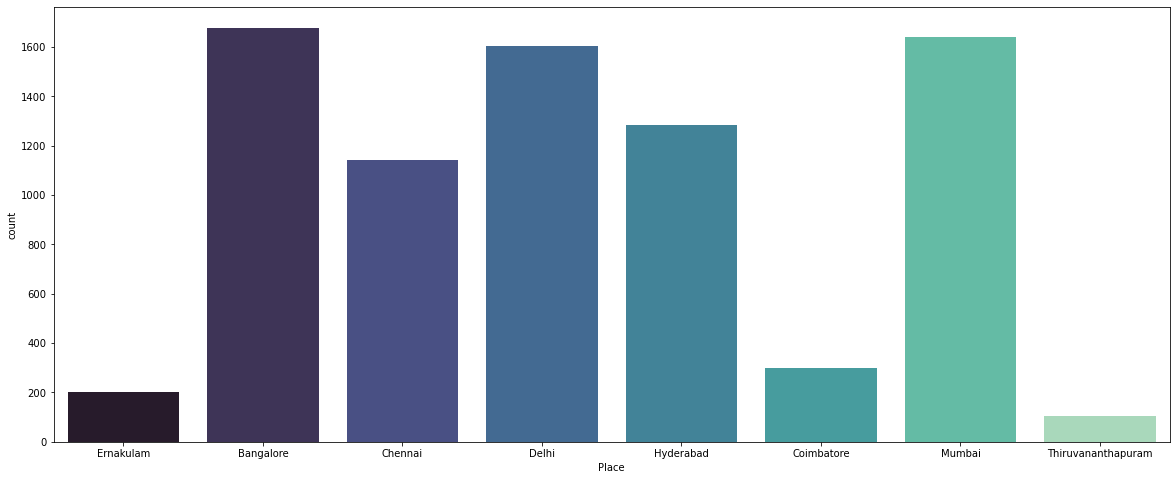

In [1046]:
plt.figure(figsize=(20,8))
sns.countplot('Place',data=df_cleaned,palette='mako')

In [1047]:
countmumbai = len(df_cleaned[df_cleaned.Place == 'Mumbai'])
countbangalore = len(df_cleaned[df_cleaned.Place == 'Bangalore'])
countdelhi = len(df_cleaned[df_cleaned.Place == 'Delhi'])
print("Percentage of mumbai: {:.2f}%".format((countmumbai / (len(df_cleaned.Place))*100)))
print("Percentage of bangalore: {:.2f}%".format((countbangalore / (len(df_cleaned.Place))*100)))
print("Percentage of delhi: {:.2f}%".format((countdelhi / (len(df_cleaned.Place))*100)))


Percentage of mumbai: 20.62%
Percentage of bangalore: 21.11%
Percentage of delhi: 20.16%


bangalore has the highest number of doctores in place 

#Profile

In [1048]:
df.Profile.value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

<AxesSubplot:xlabel='Profile', ylabel='count'>

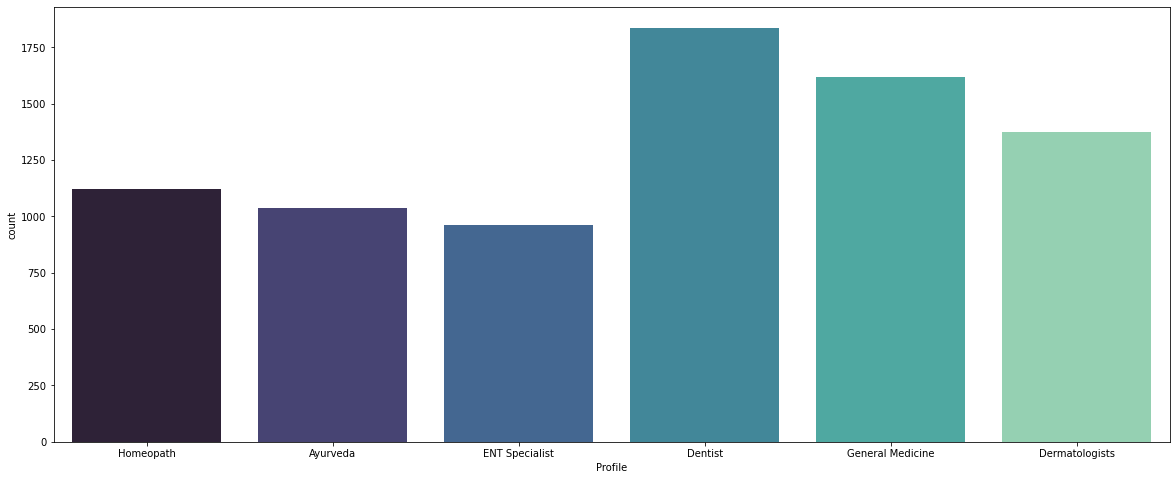

In [1049]:
plt.figure(figsize=(20,8))
sns.countplot('Profile',data=df_cleaned,palette='mako')

Most of the doctors are dentitsts by speciality.

# Miscelleanous_Info

In [1050]:
df_cleaned.Miscellaneous_Info.value_counts()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth      50
Skin Allergy Treatment Skin Allergies Dermabrasion                      18
Tooth Extraction Dental Fillings Scaling / Polishing                    16
Dental Fillings Zirconia Crowns Dental Implant Fixing                   15
Dermabrasion Laser Resurfacing Acne / Pimples Treatment                 14
                                                                        ..
Type 1 Diabetes Treatment Diabetes Renal Failure Diabetes Management     1
98% 159 Feedback Greater Kailash Part 1, Delhi                           1
97% 28 Feedback HSR Layout, Bangalore                                    1
Smile designing Aligners Oral Rehabilitation                             1
81% 29 Feedback Dwarka, Delhi                                            1
Name: Miscellaneous_Info, Length: 3980, dtype: int64

we can drop this column

In [1051]:
df_cleaned.drop('Miscellaneous_Info',1,inplace=True)

In [1052]:
df_cleaned

,Qualification,Yrs_of_Exp,Rating,Place,Profile,Fees
0,BHMS,24,100.0,Ernakulam,Homeopath,100.0
1,BAMS,12,98.0,Bangalore,Ayurveda,350.0
2,MBBS,9,100.0,Bangalore,ENT Specialist,300.0
3,Other,12,100.0,Bangalore,Ayurveda,250.0
4,BAMS,20,100.0,Chennai,Ayurveda,250.0
...,...,...,...,...,...,...
1982,BAMS,10,91.0,Bangalore,Ayurveda,NaN
1983,MD,4,100.0,Chennai,Dermatologists,NaN
1984,MBBS,9,93.0,Chennai,General Medicine,NaN
1985,BDS,12,98.0,Bangalore,Dentist,NaN


# Fees 

In [1053]:
df_cleaned.Fees.value_counts()

100.0    1306
500.0     938
200.0     904
300.0     864
400.0     424
250.0     306
150.0     253
600.0     215
700.0     153
350.0     143
800.0     143
50.0       81
450.0      65
750.0      34
550.0      22
650.0      21
900.0      18
70.0       18
80.0       12
60.0       11
30.0        4
40.0        2
130.0       2
180.0       2
10.0        2
260.0       2
380.0       2
220.0       1
430.0       1
630.0       1
299.0       1
20.0        1
280.0       1
230.0       1
5.0         1
850.0       1
950.0       1
125.0       1
920.0       1
499.0       1
Name: Fees, dtype: int64

In [1054]:
df_cleaned['Fees'].replace('Andheri West, Mumbai',np.NaN,inplace=True)

In [1055]:
df_cleaned.Fees.value_counts()

100.0    1306
500.0     938
200.0     904
300.0     864
400.0     424
250.0     306
150.0     253
600.0     215
700.0     153
350.0     143
800.0     143
50.0       81
450.0      65
750.0      34
550.0      22
650.0      21
900.0      18
70.0       18
80.0       12
60.0       11
30.0        4
40.0        2
130.0       2
180.0       2
10.0        2
260.0       2
380.0       2
220.0       1
430.0       1
630.0       1
299.0       1
20.0        1
280.0       1
230.0       1
5.0         1
850.0       1
950.0       1
125.0       1
920.0       1
499.0       1
Name: Fees, dtype: int64

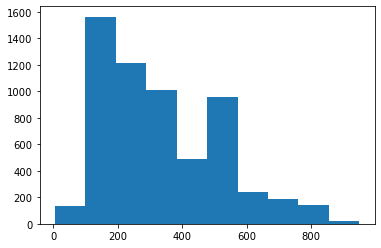

In [1056]:
plt.hist(df.Fees);

In [1057]:
df.Fees.describe()

count    5961.000000
mean      307.944640
std       190.920373
min         5.000000
25%       150.000000
50%       300.000000
75%       500.000000
max       950.000000
Name: Fees, dtype: float64

<AxesSubplot:xlabel='Fees'>

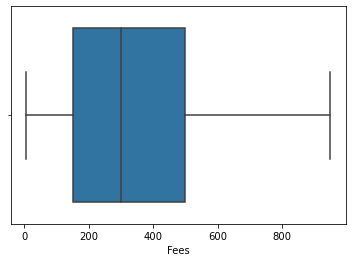

In [1058]:
sns.boxplot(df.Fees)

In [1059]:
df_cleaned.Fees.isna().sum()

1987

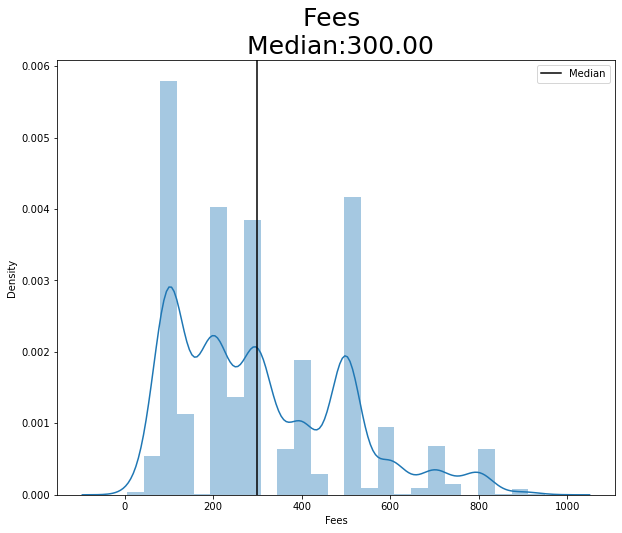

In [1060]:
plt.figure(figsize=(10,8))
sns.distplot(df_cleaned['Fees'])
plt.title('Fees \n Median:{0:.2f}'.format(df_cleaned['Fees'].median()),size=25)
plt.axvline(df_cleaned['Fees'].median(),color='black',label='Median')
plt.legend()

* Fees vs Qualification :

MBBS
BDS
BAMS
BHMS
MD
Other
MDS
MS


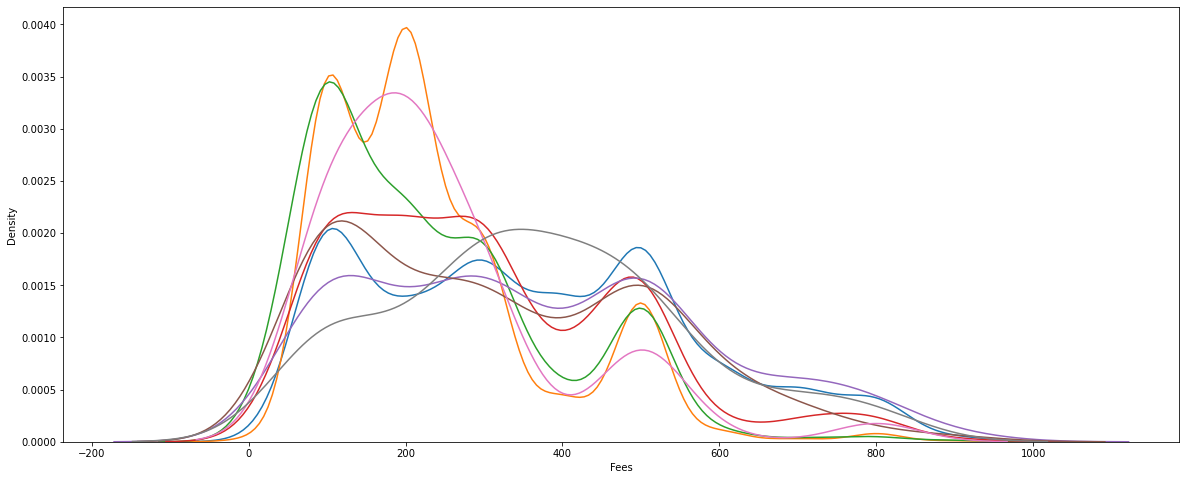

In [1061]:
plt.figure(figsize=(20,8))
for Q in df_cleaned.Qualification.value_counts().index:
    print(Q)
    sns.kdeplot(df_cleaned[df_cleaned.Qualification == Q]['Fees'],label=Q)

The doctors with BDS MDS charge high fees

#profile vs fees

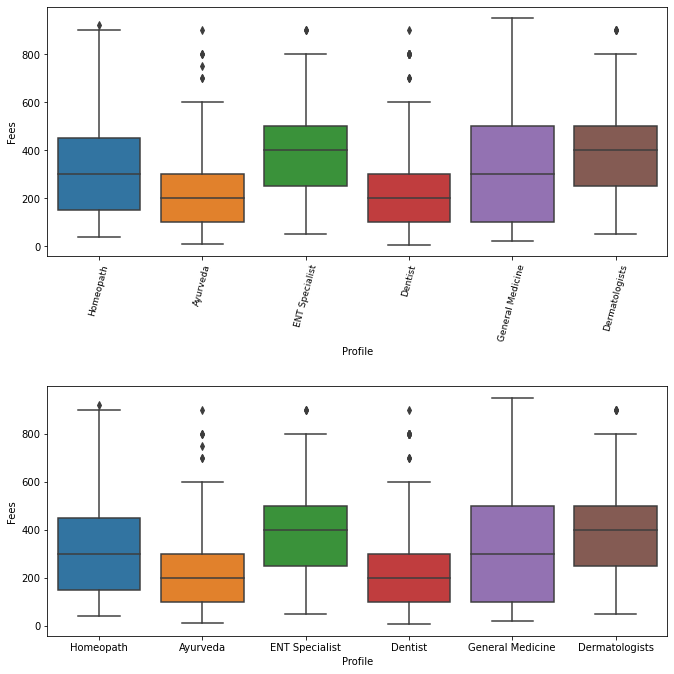

In [1062]:
labels=df_cleaned['Profile'].unique()
fig6=plt.figure(figsize=(10,10))
ax1=fig6.add_subplot(211)
sns.boxplot(x='Profile',y='Fees',data=df_cleaned,ax=ax1)
ax1.set_xticklabels(labels, rotation=75,size=9)

ax2=fig6.add_subplot(212)
sns.boxplot(x='Profile',y='Fees',data=df_cleaned,ax=ax2)

fig6.tight_layout(pad=3)

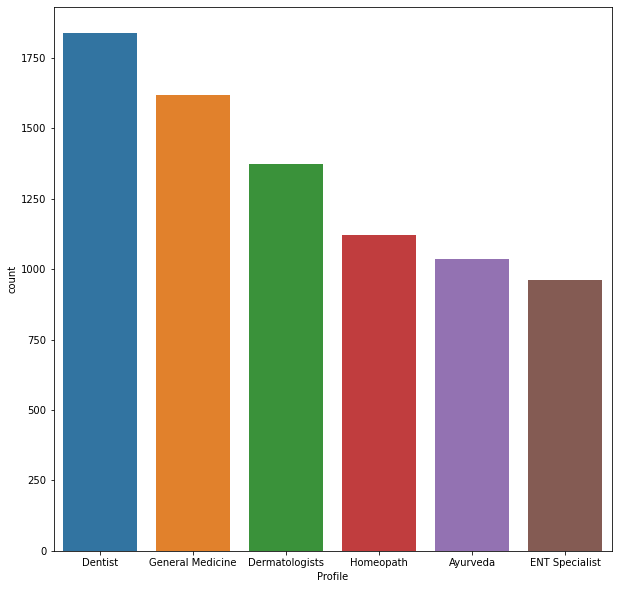

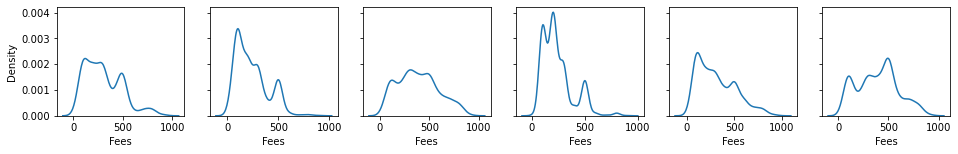

In [1063]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['Profile'],order=df_cleaned.Profile.value_counts().index)

fig,ax = plt.subplots(1,6,figsize=(16,2),sharey=True)
for i,cat in enumerate(df_cleaned.Profile.unique()):

    sns.kdeplot(df_cleaned[df_cleaned.Profile == cat]['Fees'],ax=ax[i])

experience vs fees

<AxesSubplot:xlabel='Yrs_of_Exp', ylabel='Fees'>

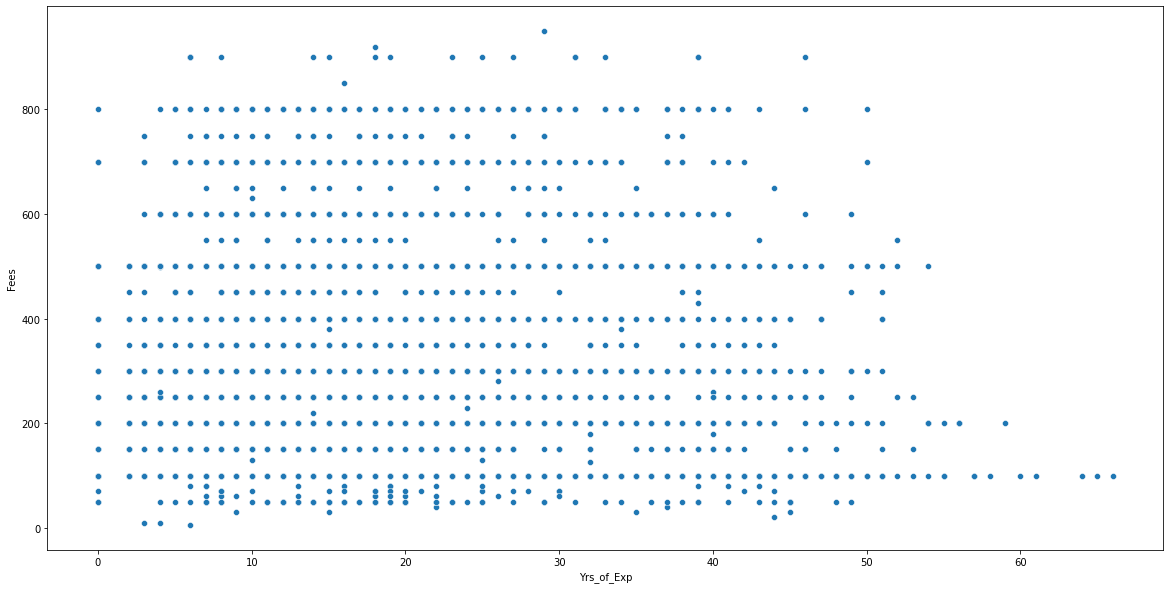

In [1064]:
plt.figure(figsize=(20,10))
sns.scatterplot(df_cleaned.Yrs_of_Exp,df_cleaned.Fees)

In [1065]:
# Fees with place.

<AxesSubplot:xlabel='Place', ylabel='Fees'>

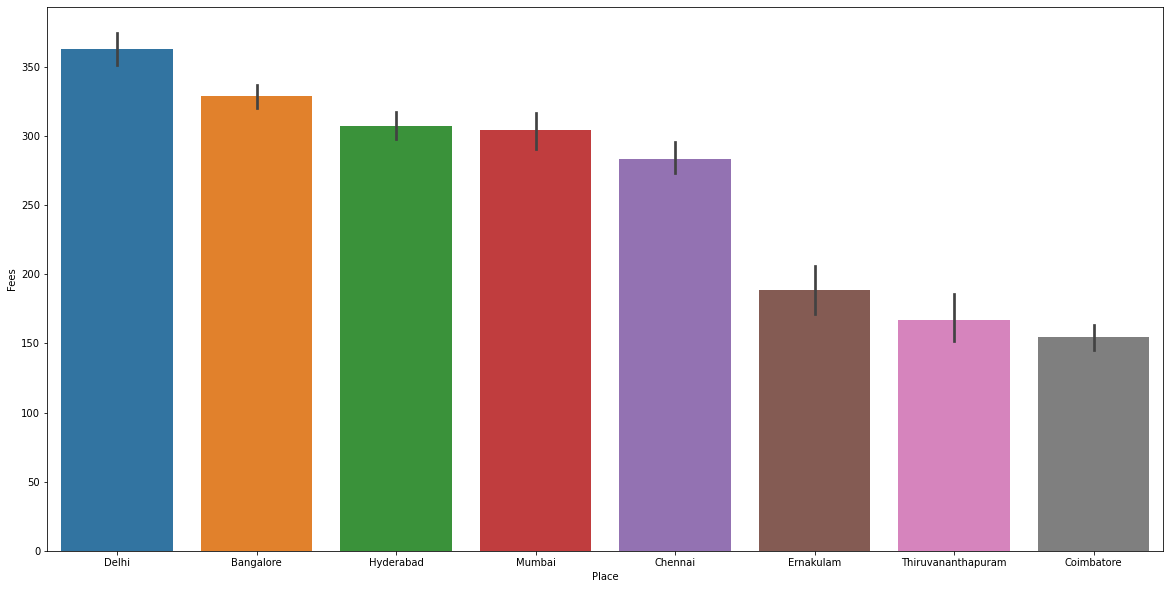

In [1066]:
plt.figure(figsize=(20,10))
sns.barplot(df_cleaned.Place,df_cleaned.Fees,order=df_cleaned.groupby('Place')['Fees'].mean().sort_values(ascending=False).index)

delhi and bangalore have very high rates as comparsion to others

ratings vs places.

<AxesSubplot:xlabel='Place', ylabel='Rating'>

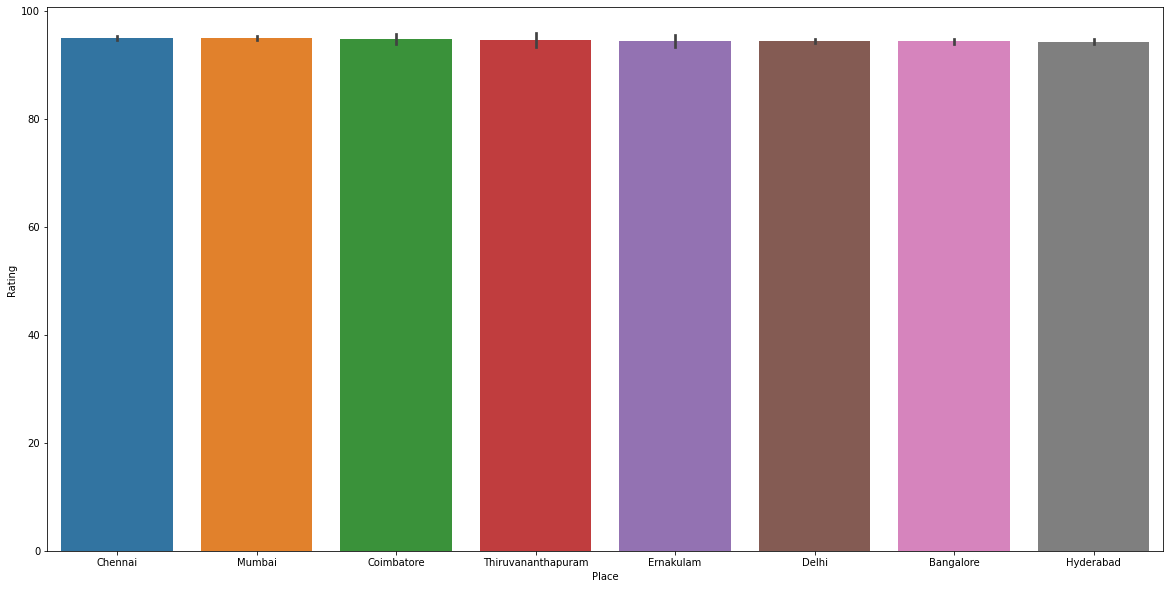

In [1067]:
plt.figure(figsize=(20,10))
sns.barplot(df_cleaned.Place,df_cleaned.Rating,order=df_cleaned.groupby('Place')['Rating'].mean().sort_values(ascending=False).index)

ratings is equally distributed

## Removing the outliers of the dataset

In [1068]:
df_cleaned 

,Qualification,Yrs_of_Exp,Rating,Place,Profile,Fees
0,BHMS,24,100.0,Ernakulam,Homeopath,100.0
1,BAMS,12,98.0,Bangalore,Ayurveda,350.0
2,MBBS,9,100.0,Bangalore,ENT Specialist,300.0
3,Other,12,100.0,Bangalore,Ayurveda,250.0
4,BAMS,20,100.0,Chennai,Ayurveda,250.0
...,...,...,...,...,...,...
1982,BAMS,10,91.0,Bangalore,Ayurveda,NaN
1983,MD,4,100.0,Chennai,Dermatologists,NaN
1984,MBBS,9,93.0,Chennai,General Medicine,NaN
1985,BDS,12,98.0,Bangalore,Dentist,NaN


lets treat numerical column----->>>>>>

<AxesSubplot:xlabel='Yrs_of_Exp'>

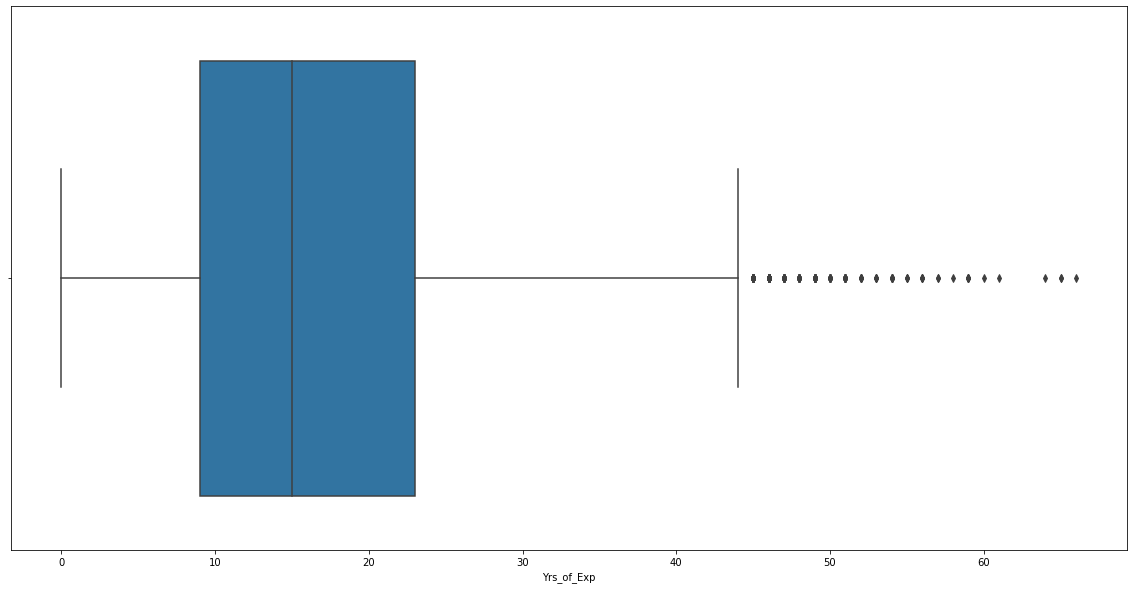

In [1069]:
 plt.figure(figsize=(20,10))
sns.boxplot(df_cleaned['Yrs_of_Exp'])

<AxesSubplot:xlabel='Rating'>

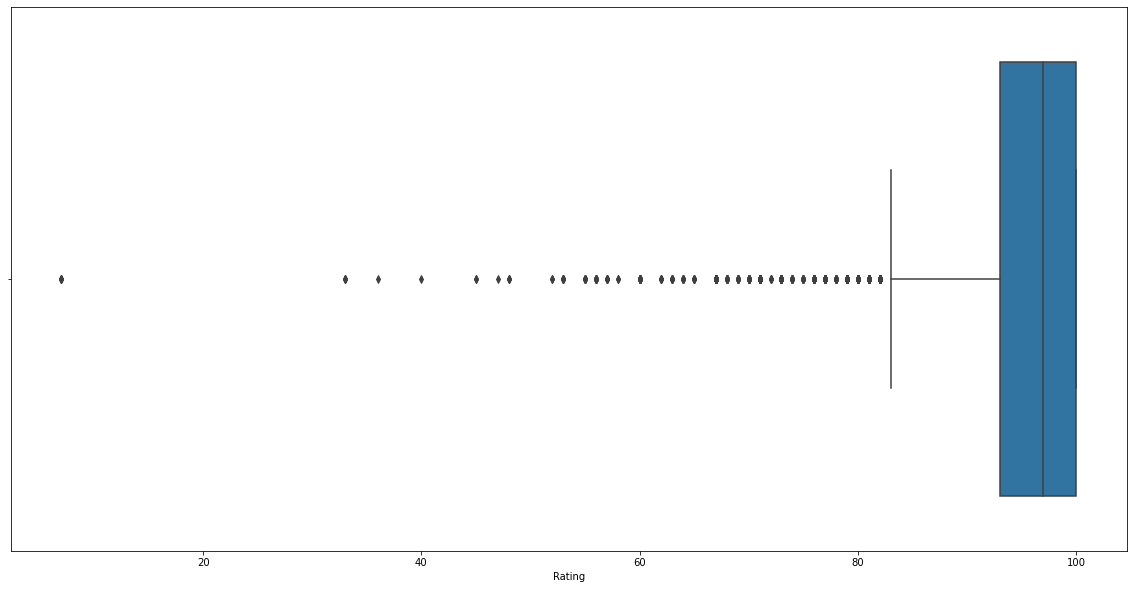

In [1070]:
 plt.figure(figsize=(20,10))
sns.boxplot(df_cleaned['Rating'])

<AxesSubplot:xlabel='Fees'>

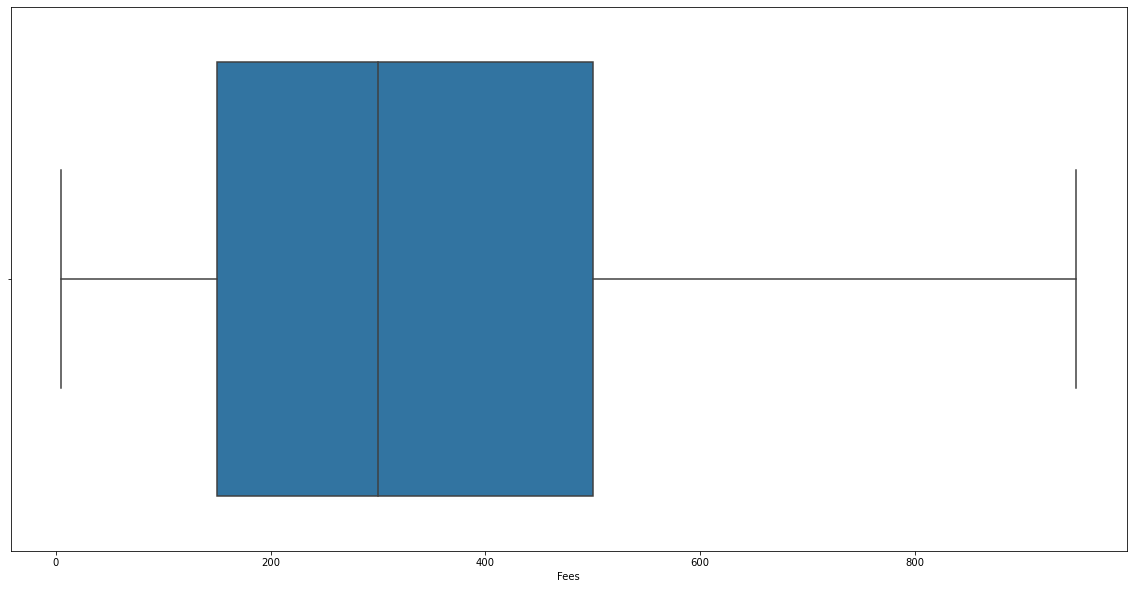

In [1071]:
 plt.figure(figsize=(20,10))
sns.boxplot(df_cleaned['Fees'])

In [1072]:
len(df_cleaned)

7947

<AxesSubplot:xlabel='Yrs_of_Exp', ylabel='Density'>

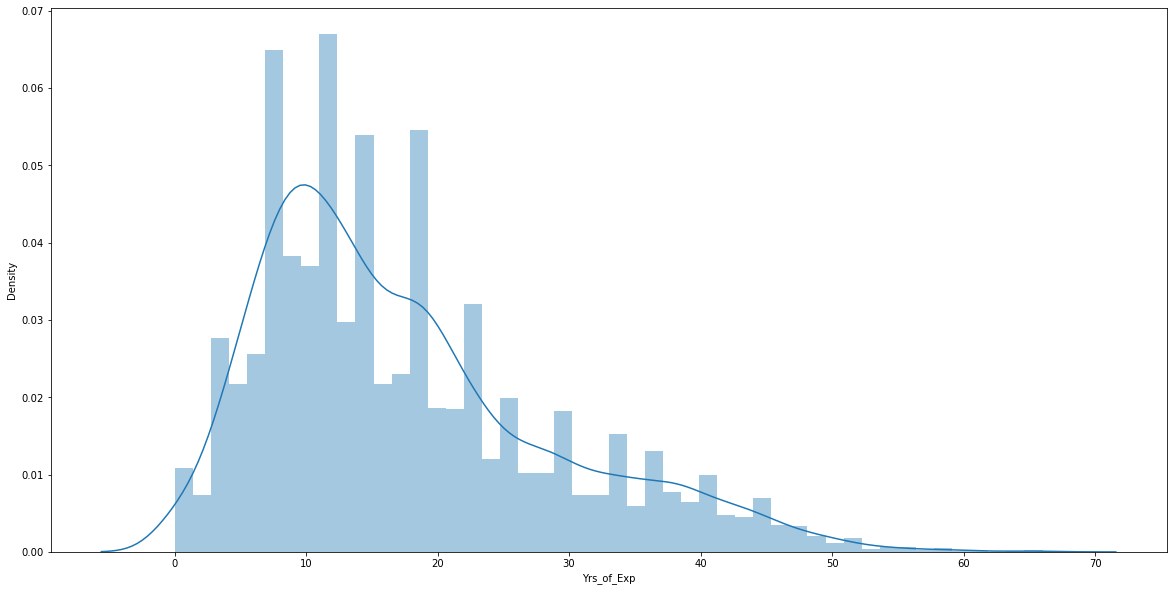

In [1073]:
plt.figure(figsize=(20,10))
sns.distplot(df_cleaned['Yrs_of_Exp'])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

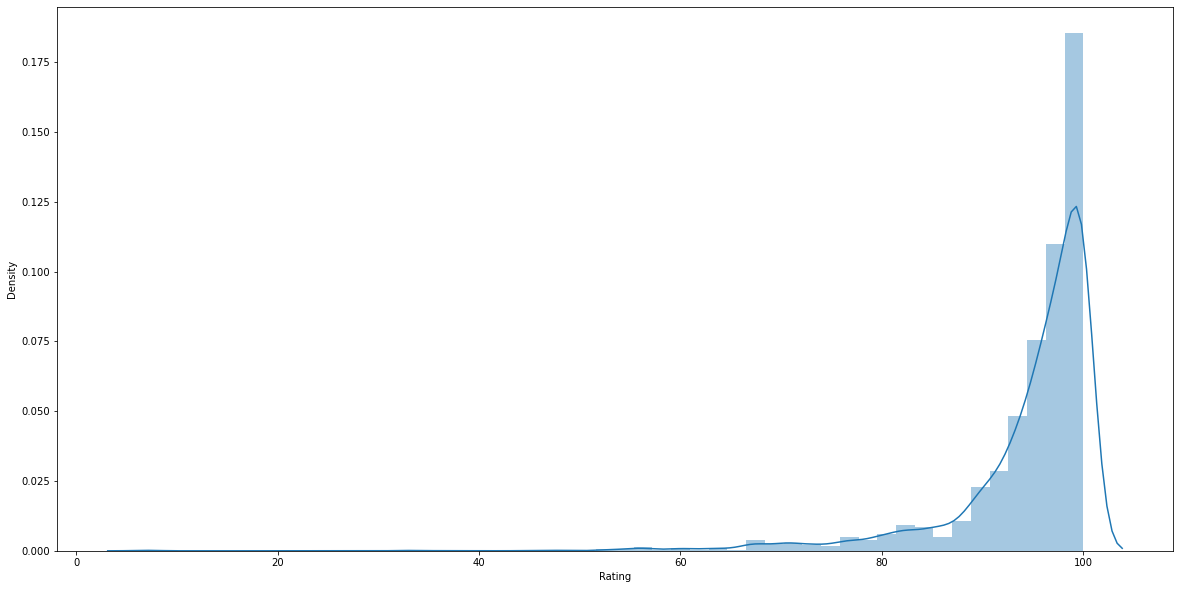

In [1074]:
plt.figure(figsize=(20,10))
sns.distplot(df_cleaned['Rating'])

<AxesSubplot:xlabel='Fees', ylabel='Density'>

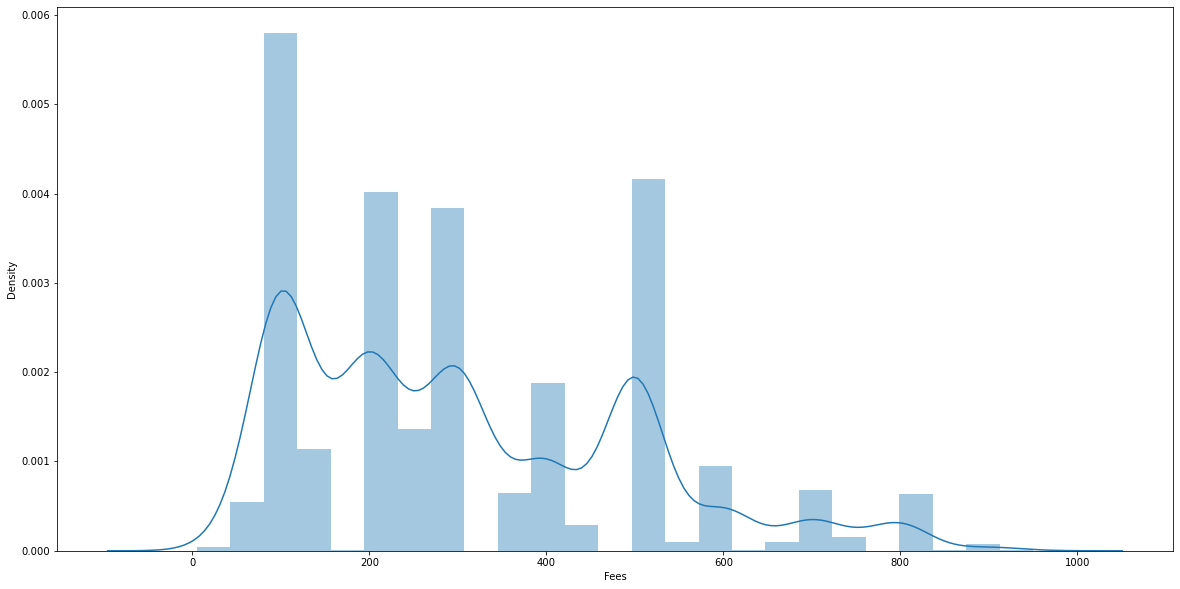

In [1075]:
plt.figure(figsize=(20,10))
sns.distplot(df_cleaned['Fees'])

Let's address the skews before removing the outliers as we can ot see any extreme outliers visually from the boxplot.

In [1076]:
df = df_cleaned[~df_cleaned.Fees.isna()]
df_test = df_cleaned[df_cleaned.Fees.isna()]

In [1077]:
df_test

,Qualification,Yrs_of_Exp,Rating,Place,Profile,Fees
0,MBBS,35,98.0,Mumbai,General Medicine,NaN
1,MBBS,31,81.0,Hyderabad,ENT Specialist,NaN
2,MBBS,40,70.0,Chennai,Dermatologists,NaN
3,BAMS,0,95.0,Delhi,Ayurveda,NaN
4,BDS,16,100.0,Bangalore,Dentist,NaN
...,...,...,...,...,...,...
1982,BAMS,10,91.0,Bangalore,Ayurveda,NaN
1983,MD,4,100.0,Chennai,Dermatologists,NaN
1984,MBBS,9,93.0,Chennai,General Medicine,NaN
1985,BDS,12,98.0,Bangalore,Dentist,NaN


removing outlier via quantile

In [1078]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [1079]:
len(df)

5411

<AxesSubplot:xlabel='Rating', ylabel='Density'>

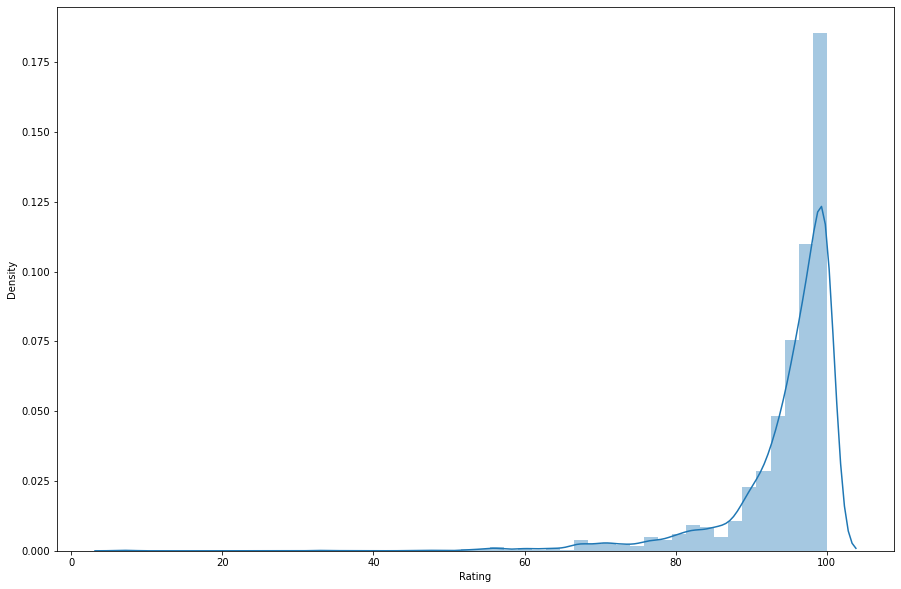

In [1080]:
plt.figure(figsize=(15,10))
sns.distplot(df_cleaned['Rating'])

## Encoding the categorical data

In [1081]:
df

,Qualification,Yrs_of_Exp,Rating,Place,Profile,Fees
0,BHMS,24,100.0,Ernakulam,Homeopath,100.0
1,BAMS,12,98.0,Bangalore,Ayurveda,350.0
2,MBBS,9,100.0,Bangalore,ENT Specialist,300.0
3,Other,12,100.0,Bangalore,Ayurveda,250.0
4,BAMS,20,100.0,Chennai,Ayurveda,250.0
...,...,...,...,...,...,...
5956,MBBS,19,98.0,Bangalore,ENT Specialist,300.0
5957,MBBS,33,99.0,Chennai,General Medicine,100.0
5958,MBBS,41,97.0,Delhi,General Medicine,600.0
5959,MBBS,15,90.0,Mumbai,General Medicine,100.0


In [1082]:
df.columns[df.dtypes=="object"]

Index(['Qualification', 'Place', 'Profile'], dtype='object')

In [1083]:
df=pd.get_dummies(df,columns=df.columns[df.dtypes=="object"],drop_first=True)
df_test=pd.get_dummies(df_test,columns=df_test.columns[df_test.dtypes=="object"],drop_first=True)


In [1084]:
df.head()

,Yrs_of_Exp,Rating,Fees,Qualification_BDS,Qualification_BHMS,Qualification_MBBS,Qualification_MD,Qualification_MDS,Qualification_MS,Qualification_Other,...,Place_Delhi,Place_Ernakulam,Place_Hyderabad,Place_Mumbai,Place_Thiruvananthapuram,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,100.0,100.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,12,98.0,350.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,100.0,300.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,100.0,250.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,20,100.0,250.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1085]:
df.dtypes

Yrs_of_Exp                    int32
Rating                      float64
Fees                        float64
Qualification_BDS             uint8
Qualification_BHMS            uint8
Qualification_MBBS            uint8
Qualification_MD              uint8
Qualification_MDS             uint8
Qualification_MS              uint8
Qualification_Other           uint8
Place_Chennai                 uint8
Place_Coimbatore              uint8
Place_Delhi                   uint8
Place_Ernakulam               uint8
Place_Hyderabad               uint8
Place_Mumbai                  uint8
Place_Thiruvananthapuram      uint8
Profile_Dentist               uint8
Profile_Dermatologists        uint8
Profile_ENT Specialist        uint8
Profile_General Medicine      uint8
Profile_Homeopath             uint8
dtype: object

In [1086]:
df.columns

Index(['Yrs_of_Exp', 'Rating', 'Fees', 'Qualification_BDS',
       'Qualification_BHMS', 'Qualification_MBBS', 'Qualification_MD',
       'Qualification_MDS', 'Qualification_MS', 'Qualification_Other',
       'Place_Chennai', 'Place_Coimbatore', 'Place_Delhi', 'Place_Ernakulam',
       'Place_Hyderabad', 'Place_Mumbai', 'Place_Thiruvananthapuram',
       'Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath'],
      dtype='object')

<AxesSubplot:>

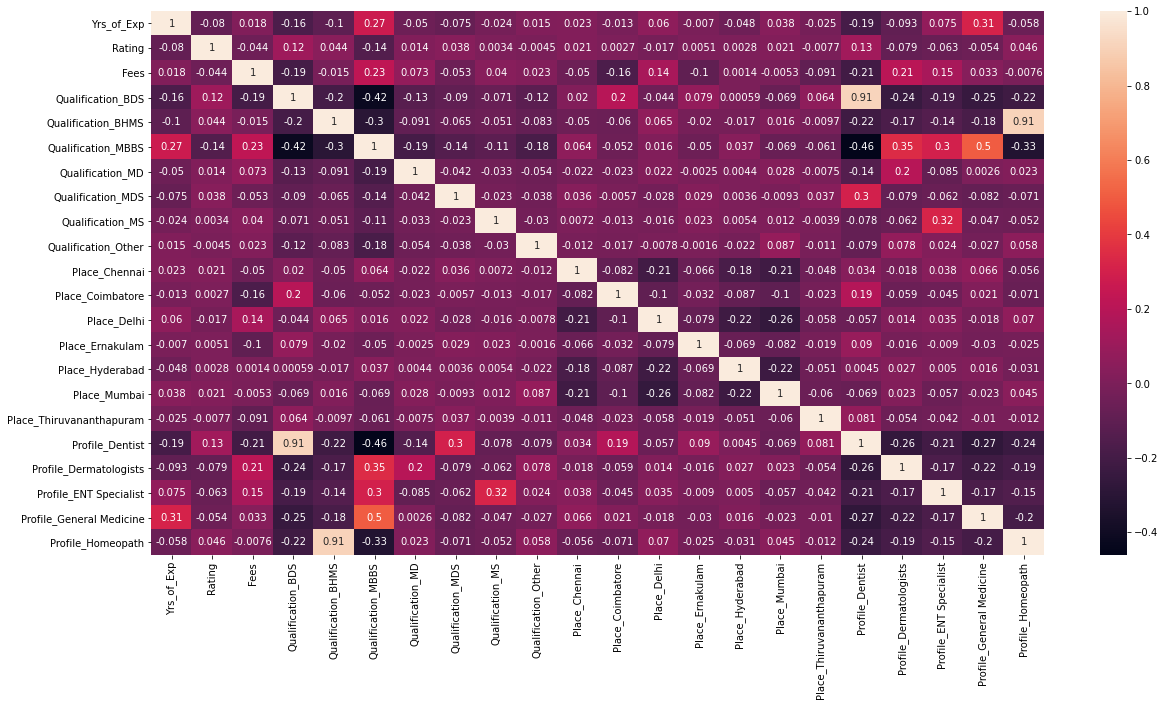

In [1087]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

as now we have a balanced data we can train test split

train test split

In [1088]:
X = df.drop('Fees',1)
y = df['Fees']

In [1089]:
y.shape

(5411,)

In [1090]:
X.shape

(5411, 21)

In [1091]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [1092]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3625, 21), (1786, 21), (3625,), (1786,))

as data isnt scaled so we should do scaling via standard scaling

In [1093]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building the model.

In [1094]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [1095]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error

In [1096]:
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_train)
    print('MSE:',mean_squared_error(y_train,y_preds))
    print('MSLE',mean_squared_log_error(y_train,y_preds))  

In [1097]:
train_n_ret_scores(LinearRegression())

MSE: 30570.95125326137
MSLE 0.42393418899216134


In [1098]:
# try2: Ridge Regression
train_n_ret_scores(Ridge())

MSE: 30570.95417928302
MSLE 0.42394164965998715


In [1099]:
# ElasticNet
train_n_ret_scores(ElasticNet(alpha=0.0001))

MSE: 30570.95137025347
MSLE 0.4239356039010958


In [1100]:
# try4: SVR
train_n_ret_scores(SVR(kernel='linear'))

MSE: 32119.33973818462
MSLE 0.41149940188661727


In [1101]:
# try4: SVR
train_n_ret_scores(SVR())

MSE: 33979.69260494056
MSLE 0.41780570048096227


In [1102]:
# try5: Decision Trees
train_n_ret_scores(DecisionTreeRegressor(criterion='mse'))

MSE: 3893.3755073891625
MSLE 0.057376829436440784


In [1103]:
# try6: Random Forest
train_n_ret_scores(RandomForestRegressor())

MSE: 7720.190431676326
MSLE 0.13720374000826976


In [1104]:
# try9: Adaboost with DC

train_n_ret_scores(AdaBoostRegressor(base_estimator=DecisionTreeRegressor()))

MSE: 5263.8432004920915
MSLE 0.09766797303431565


In [1105]:
# try 8: Gradient Boosting
train_n_ret_scores(GradientBoostingRegressor())

MSE: 28029.894426931758
MSLE 0.3958373924591732


In [1106]:
# try 3 : KNN
train_n_ret_scores(KNeighborsRegressor())

MSE: 22882.85846068965
MSLE 0.31797398106343644


In [1107]:
models = [LinearRegression(),Ridge(alpha=0.001),Lasso(alpha=0.0003),ElasticNet(alpha=0.0001),SVR(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(base_estimator=LinearRegression())]
model_names = 'Linear Ridge Lasso ElasticNet SVR Descision_Tree Random_Forest Gradient_Boost Ada_Boost'.split()
models_df = pd.DataFrame(columns=['Model','MSE','RSLE','meanCV'])
for model,model_names in zip(models,model_names):
    print(model)
    
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_train)
    
    mse = mean_squared_error(y_train,y_preds)
    rmsle = np.sqrt(mean_squared_log_error(y_train,y_preds))
    avgCV = np.mean(cross_val_score(model,X,y))
    
    
    models_df = models_df.append({'Model':model_names,'MSE':mse,'RMSLE':rmsle,'meanCV':avgCV},ignore_index=True)

LinearRegression()
Ridge(alpha=0.001)
Lasso(alpha=0.0003)
ElasticNet(alpha=0.0001)
SVR()
DecisionTreeRegressor()
RandomForestRegressor()
GradientBoostingRegressor()
AdaBoostRegressor(base_estimator=LinearRegression())


In [1108]:
models_df

,Model,MSE,RSLE,meanCV,RMSLE
0,Linear,30570.951253,NaN,0.147325,0.651102
1,Ridge,30570.951253,NaN,0.147326,0.651102
2,Lasso,30570.951291,NaN,0.147330,0.651103
3,ElasticNet,30570.951370,NaN,0.147394,0.651103
4,SVR,33979.692605,NaN,-0.001932,0.646379
5,Descision_Tree,3893.375507,NaN,-0.605212,0.239535
6,Random_Forest,7752.789812,NaN,-0.004004,0.372071
7,Gradient_Boost,28029.894427,NaN,0.167668,0.629156
8,Ada_Boost,31613.218342,NaN,0.115827,0.685770


<AxesSubplot:ylabel='Model'>

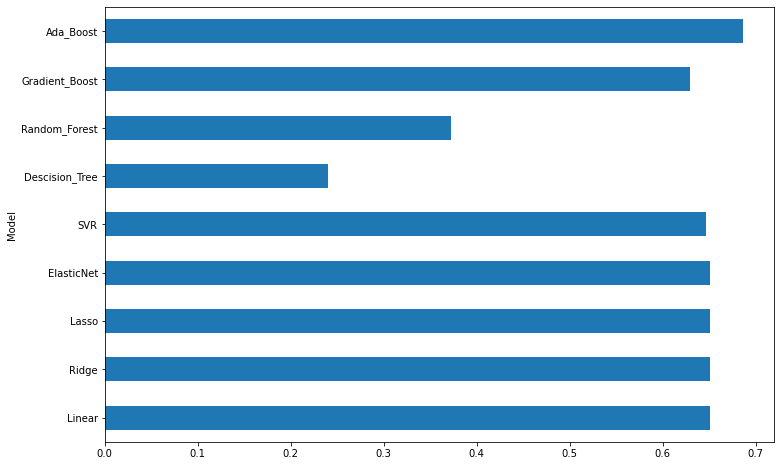

In [1109]:
models_df.set_index('Model', inplace=True)
models_df['RMSLE'].plot(kind='barh', figsize=(12, 8))

AS THIS ISN'T SHOWING GOOD RESULTS, LETS TUNE IT WITH HYPERPARAMETER TUNING TO GET GOOD RESULT

HyperParameter Tuning

In [1110]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# to use RMSLE we will create our own scorer
from sklearn.metrics import make_scorer

In [1111]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    # 1-RMSLE

# make our own scorer
scorer = make_scorer(score,greater_is_better=True, needs_proba=False)

In [1112]:
knn_reg = KNeighborsRegressor()
svm_reg = SVR(gamma='scale')
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()

In [1113]:
for reg in (knn_reg, svm_reg, dt_reg, rf_reg):
    reg.fit(X_train, y_train)
    
    y_pred = reg.predict(X_test)
    
    print(reg, score(y_pred,y_test))

KNeighborsRegressor() 0.7685168322677537
SVR() 0.7903967554884183
DecisionTreeRegressor() 0.6347800974707913
RandomForestRegressor() 0.7597262145601456


In [1114]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [1115]:
grid = dict(C=[0.1,1,10], kernel=['linear','poly','rbf'], gamma=['scale','auto'])

#gridsearch = GridSearchCV(svm_reg, param_grid=parameters, cv=5, scoring=scorer verbose=1, n_jobs=-1)
svm_random = RandomizedSearchCV(svm_reg, param_distributions= grid, scoring=scorer, cv=5, random_state=42, n_iter=100, verbose=1, n_jobs=-1)

In [1116]:
svm_random.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   54.5s finished


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   random_state=42, scoring=make_scorer(score), verbose=1)

In [1117]:
print("best_score:",svm_random.best_score_)
print("best_params:\n",svm_random.best_params_)

best_score: 0.8006080940318062
best_params:
 {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


In [1118]:
predictions = svm_random.predict(X_test)

print("1-RMSLE:",score(predictions, y_test))

1-RMSLE: 0.8025181543373897


Trying Hyperparameter tuning for RandomForest Regressor



In [1119]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [1120]:
#no. of tress random_forest
n_estimators = [int(x) for x in np.linspace(start=150,stop=1000,num=6)]
#max levels in tree
max_depth = [int(x) for x in np.linspace(start=6,stop=30,num=5)]
#min no. of splitting required to split a node
min_samples_split = [2,7,10]
#min no. of sample required at each leaf node
min_samples_leaf = [2,5]
#max_features
max_features=['sqrt','auto']

# generate a dictionary of all the Hyper Parameters
random_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features':max_features,
              }

print(random_grid)

{'n_estimators': [150, 320, 490, 660, 830, 1000], 'max_depth': [6, 12, 18, 24, 30], 'min_samples_split': [2, 7, 10], 'min_samples_leaf': [2, 5], 'max_features': ['sqrt', 'auto']}


In [1121]:
rf_random = RandomizedSearchCV(rf_reg, param_distributions=random_grid, scoring=scorer, cv=5, n_iter=100, random_state=42, verbose=1, n_jobs=-1)

rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [2, 5],
                                        'min_samples_split': [2, 7, 10],
                                        'n_estimators': [150, 320, 490, 660,
                                                         830, 1000]},
                   random_state=42, scoring=make_scorer(score), verbose=1)

In [1122]:
print("best_params:\n",rf_random.best_params_)
print("\nbest_score:",rf_random.best_score_)

best_params:
 {'n_estimators': 320, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 18}

best_score: 0.7856679586492126


In [1123]:
## Testing on the Test set.

In [1124]:
best_model = RandomForestRegressor()

In [1125]:
best_model.fit(X_train,y_train)

RandomForestRegressor()

In [1126]:
best_model.score(X_train,y_train)

0.7869584118929855

In [1127]:
df_test.drop('Fees',1,inplace=True)

In [1129]:
test_prediction = best_model.predict(df_test)

In [1130]:
test_prediction

array([149.86666667, 211.1       , 321.2       , ..., 266.51666667,
       218.7       , 321.2       ])

In [1131]:
pd.DataFrame(test_prediction,columns=['Fees']).to_csv('test_result.csv')

Saving the model

In [1132]:
import joblib

In [1133]:
joblib.dump(best_model,'doctors_consuluation.pkl')

['doctors_consuluation.pkl']

#SUMMARY

as shown above the complete EDA and complete model building and the best model predicted for doctor consultation fee dataset and showing best results..